<center> <h1>Método de Regula Falsi o Falsa Posición</h1> </center>

El método de falsa posición parte de dos puntos que rodean a la raíz $f(x) = 0$, es decir, un intervalo inicial $[a_0,b_0]$ con $f(a_0)$ y $f(b_0)$ de signos opuestos, lo que garantiza que en su interior hay al menos una raíz. 

El algoritmo va obteniendo sucesivamente en cada paso un intervalo más pequeño $[a_k, b_k]$ que sigue incluyendo una raíz de la función $f$. A partir de un intervalo $[a_k, b_k]$ se calcula un punto interior $c_k$ tal que:

$${\displaystyle c_{k}={\frac {f(b_{k})a_{k}-f(a_{k})b_{k}}{f(b_{k})-f(a_{k})}}}$$

Dicho punto es la intersección de la recta que pasa por $(a_k,f(a_k))$ y $(b_k,f(b_k))$ con el eje de abscisas.

Se evalúa entonces $f(c_k)$. Si es suficientemente pequeño, $c_k$ es la raíz buscada. Si no, el próximo intervalo $[a_{k+1}, b_{k+1}]$ será:

* $[a_k, c_k]$ si $f(a_k)$ y $f(c_k)$ tienen signos opuestos;

* $[c_k, b_k]$ en caso contrario.

A continuación se muestra un gráfico con las primeras dos iteraciones de regula falsi. La curva roja muestra la función $f$; las líneas azules, las secantes.

![Falsa posicion](./images/falsa_posicion1.jpg "Falsa posicion")

La elección del intervalo utilizando dicha fórmula representa una mejora con respecto al método de bisección, ya que no se limita a partir el intervalo por la mitad, con lo que mejora notablemente la elección del intervalo. Por otra parte, inhibe la posibilidad de una divergencia del método, lo cual representa una ventaja respecto al método de la secante. 

Se puede demostrar que bajo ciertas condiciones el método de falsa posición tiene orden de convergencia lineal, por lo que suele converger más lentamente a la solución de la ecuación que el método de la secante, aunque el método de falsa posición siempre converge a una solución de la ecuación.

A continuación presentamos un programa en Python para hallar una raíz de la función 

$$f(x) = \frac{667.38}{x}(1 - e^{-0.146843.x})-40$$

donde $x_{low} = 12, x_{high} = 16$ y el criterio de parada es $e_a=0.01%$

Iteration 	 x_low 	 x_high 	 true_error 	 relative_error
	 0 	 12.0 	 14.91131 	 0.8543 	 nan
	 1 	 12.0 	 14.7942 	 0.06221 	 0.7916
	 2 	 12.0 	 14.7817 	 0.02232 	 0.08455
	 3 	 12.0 	 14.78037 	 0.03133 	 0.00902

x = 14.78036760579795 whit relative_error = (+/-) 0.01 %


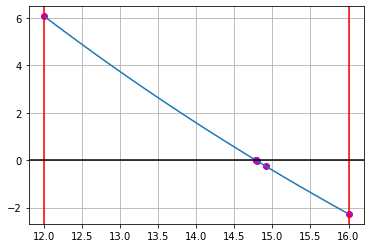

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

def equation(x):
    return 667.38/x*(1-math.pow(np.e, -0.146843*x))-40

x_low = 12.0
x_high = 16.0
error_a = 0.01
analytical_result = 14.785

iterations = 0
error_a_iterations = math.nan
x_c_previous = 0

plt.plot(x_high,equation(x_high),'mo')
plt.plot(x_low,equation(x_low),'mo')
print("Iteration \t x_low \t x_high \t true_error \t relative_error")
while((error_a_iterations > error_a) or (math.isnan(error_a_iterations))):
    x_c_current = x_high - ((equation(x_high)*(x_low - x_high))/(equation(x_low) - equation(x_high)))
    f_x_low = equation(x_low)
    f_x_c = equation(x_c_current)
    plt.plot(x_c_current,f_x_c,'mo')
    if (f_x_low*f_x_c < 0):
        x_high = x_c_current
    else:
        x_low = x_c_current
    error_true = np.abs((analytical_result - x_c_current)/analytical_result)*100
    if (iterations > 0):
        error_a_iterations = np.abs((x_c_current - x_c_previous)/x_c_current)*100
    print("\t", iterations, "\t", round(x_low, 5), "\t", round(x_high, 5), \
          "\t", round(error_true, 5), "\t", round(error_a_iterations, 5))
    x_c_previous = x_c_current
    iterations += 1

print("\nx =", x_c_current, "whit relative_error = (+/-)", error_a, "%")

#*************************************************************************
x = np.linspace(12, 16, num = 100)
f_x = []

for i in range(len(x)):
    f_x.append(667.38/x[i]*(1-math.pow(np.e, -0.146843*x[i]))-40)

plt.plot(x, f_x)
plt.scatter(x_c_current, 0, color = 'r')
plt.grid()
plt.axvline(12, color = 'r')
plt.axvline(16, color = 'r')
plt.axhline(color = 'k')
plt.show()

<center> <h3>Bibliografía</h3> </center>

* [Método de la regla falsa](https://es.wikipedia.org/wiki/M%C3%A9todo_de_la_regla_falsa)

* [Regula falsi](https://en.wikipedia.org/wiki/Regula_falsi#The_regula_falsi_(false_position)_method)

* [Método_falsa_posición](https://github.com/ASantosMorales/Numerical_Analysis/blob/master/M%C3%A9todo_falsa_posici%C3%B3n.ipynb)
